**1. Загрузить файл 'telecom_churn.csv'.**

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from category_encoders import CountEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [24]:
df = pd.read_csv('telecom_churn.csv')
df['Area code'] = df['Area code'].astype(str)
num = df.select_dtypes(include='number').columns
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [25]:
num

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'],
      dtype='object')

**2. Проверить данные на наличие пропусков и выбросов. Обработать пропуски и выбросы.**

In [26]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [27]:
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [28]:
for col in num:
    df = handle_outliers(df, col)

In [29]:
df.reset_index(inplace=True)
df

,index,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,KS,128,415,No,Yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,1,OH,107,415,No,Yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,2,NJ,137,415,No,No,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,4,OK,75,415,Yes,No,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
4,5,AL,118,510,Yes,No,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,3328,AZ,192,415,No,Yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2793,3329,WV,68,415,No,No,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2794,3330,RI,28,510,No,No,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2795,3331,CT,184,510,Yes,No,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


**3. Выполнить кодирование категориальных переменных.**

In [30]:
categor_df = df.select_dtypes(exclude=[np.number])
categor_df.head()

,State,Area code,International plan,Voice mail plan,Churn
0,KS,415,No,Yes,False
1,OH,415,No,Yes,False
2,NJ,415,No,No,False
3,OK,415,Yes,No,False
4,AL,510,Yes,No,False


In [31]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = encoder.fit_transform(df[['Area code', 'International plan', 'Voice mail plan']])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Area code', 'International plan', 'Voice mail plan']))
encoded_df

,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0
...,...,...,...,...
2792,1.0,0.0,0.0,1.0
2793,1.0,0.0,0.0,0.0
2794,0.0,1.0,0.0,0.0
2795,0.0,1.0,1.0,0.0


In [32]:
c_encoder = ce_CountEncoder(normalize=True)
state_encode = c_encoder.fit_transform(categor_df['State'])
state_encode.reset_index(inplace=True)

In [33]:
state_encode

,index,State
0,0,0.021452
1,1,0.023597
2,2,0.021809
3,3,0.017519
4,4,0.023954
...,...,...
2792,2792,0.018949
2793,2793,0.032535
2794,2794,0.020021
2795,2795,0.022882


In [34]:
categor_df = pd.concat([encoded_df, state_encode], axis=1)

In [35]:
categor_df

,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes,index,State
0,1.0,0.0,0.0,1.0,0,0.021452
1,1.0,0.0,0.0,1.0,1,0.023597
2,1.0,0.0,0.0,0.0,2,0.021809
3,1.0,0.0,1.0,0.0,3,0.017519
4,0.0,1.0,1.0,0.0,4,0.023954
...,...,...,...,...,...,...
2792,1.0,0.0,0.0,1.0,2792,0.018949
2793,1.0,0.0,0.0,0.0,2793,0.032535
2794,0.0,1.0,0.0,0.0,2794,0.020021
2795,0.0,1.0,1.0,0.0,2795,0.022882


In [36]:
contacted_df = pd.concat([df, categor_df], axis=1)
contacted_df.drop(['Area code', 'International plan', 'Voice mail plan', 'State', 'Churn'], axis=1, inplace=True)
contacted_df

,index,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes,index
0,0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,1.0,0.0,0.0,1.0,0
1,1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,1.0,0.0,0.0,1.0,1
2,2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,1.0,0.0,0.0,0.0,2
3,4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,1.0,0.0,1.0,0.0,3
4,5,118,0,223.4,98,37.98,220.6,101,18.75,203.9,...,9.18,6.3,6,1.70,0,0.0,1.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,...,12.56,9.9,6,2.67,2,1.0,0.0,0.0,1.0,2792
2793,3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,...,8.61,9.6,4,2.59,3,1.0,0.0,0.0,0.0,2793
2794,3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,...,8.64,14.1,6,3.81,2,0.0,1.0,0.0,0.0,2794
2795,3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,...,6.26,5.0,10,1.35,2,0.0,1.0,1.0,0.0,2795


In [37]:
contacted_df = contacted_df.drop('index', axis=1)

**4. Выполнить масштабирование признаков.**

In [38]:
colnm = contacted_df.columns
m_scaler = MinMaxScaler()
rez_df = pd.DataFrame(m_scaler.fit_transform(contacted_df))

rez_df.columns = colnm
rez_df.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,0.622549,0.50,0.798455,0.600000,0.798430,0.486667,0.481132,0.486710,0.665428,0.413462,0.665289,0.474820,0.222222,0.474667,0.333333,1.0,0.0,0.0,1.0
1,0.519608,0.52,0.435042,0.723810,0.434944,0.479630,0.518868,0.479739,0.701487,0.528846,0.701653,0.741007,0.222222,0.741333,0.333333,1.0,0.0,0.0,1.0
2,0.666667,0.00,0.722261,0.638095,0.722222,0.204444,0.584906,0.204357,0.360223,0.538462,0.360331,0.633094,0.444444,0.632000,0.000000,1.0,0.0,0.0,0.0
3,0.362745,0.00,0.452949,0.628571,0.452912,0.304815,0.698113,0.305011,0.450558,0.701923,0.450413,0.482014,0.222222,0.482667,1.000000,1.0,0.0,1.0,0.0
4,0.573529,0.00,0.652037,0.485714,0.652003,0.572593,0.500000,0.572549,0.513755,0.673077,0.514050,0.208633,0.555556,0.208000,0.000000,0.0,1.0,1.0,0.0


**5. Построить модели k-ближайших соседей, логистической регрессии, SVM**

a. Обучить модель по кросс-валидации и выведите на экран значения метрик.

In [42]:
x = rez_df
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [45]:
#KNN
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print('KNN Accuracy:', accuracy_score(y_test, y_pred))
print("KNN Classification Report:\n", classification_report(y_test, y_pred))

KNN Accuracy: 0.9023809523809524
KNN Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.99      0.95       746
        True       0.70      0.22      0.34        94

    accuracy                           0.90       840
   macro avg       0.80      0.61      0.64       840
weighted avg       0.89      0.90      0.88       840



In [46]:
#logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(x_train, y_train)
y_pred = logreg_model.predict(x_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9023809523809524
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.99      0.95       746
        True       0.71      0.21      0.33        94

    accuracy                           0.90       840
   macro avg       0.81      0.60      0.64       840
weighted avg       0.89      0.90      0.88       840



In [47]:
#SVM
svc_model = SVC()
svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)
print('SVC Accuracy:', accuracy_score(y_test, y_pred))
print("SVC Classification Report:\n", classification_report(y_test, y_pred))

SVC Accuracy: 0.9142857142857143
SVC Classification Report:
               precision    recall  f1-score   support

       False       0.91      1.00      0.95       746
        True       0.92      0.26      0.40        94

    accuracy                           0.91       840
   macro avg       0.92      0.63      0.68       840
weighted avg       0.92      0.91      0.89       840



b. Подобрать значение параметров модели по кросс-валидации, используя GridSearchCV.

In [54]:
#params for selection
knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

#GridSearchCV for KNN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(x_train, y_train)

#Best model KNN
best_knn_model = knn_grid_search.best_estimator_
y_pred_best_knn = best_knn_model.predict(x_test)
best_knn_accuracy = accuracy_score(y_test, y_pred_best_knn)
best_knn_class_report = classification_report(y_test, y_pred_best_knn)
print("Best KNN model parameters:", knn_grid_search.best_params_)
print("Best KNN Accuracy:", best_knn_accuracy)
print("Best KNN Classification Report:\n", best_knn_class_report)

Best KNN model parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Best KNN Accuracy: 0.9023809523809524
Best KNN Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.99      0.95       746
        True       0.70      0.22      0.34        94

    accuracy                           0.90       840
   macro avg       0.80      0.61      0.64       840
weighted avg       0.89      0.90      0.88       840



In [55]:
# Params for selection
logreg_param_grid = {'C':[0.01, 0.1, 1, 10, 100], 'solver':['liblinear', 'lbfgs']}

#GridSearchCV for Logistic Regression
logreg_grid_search = GridSearchCV(LogisticRegression(max_iter=1000), logreg_param_grid, cv=5, scoring='accuracy')
logreg_grid_search.fit(x_train, y_train)

# Best model for logistic Regression
best_logreg_model = logreg_grid_search.best_estimator_
y_pred_best_logreg = best_logreg_model.predict(x_test)
best_logreg_accuracy = accuracy_score(y_test, y_pred_best_logreg)
best_logreg_class_report = classification_report(y_test, y_pred_best_logreg)
print('Best Logistic Regression model parameters:', logreg_grid_search.best_params_)
print('Best Logistic Regression Accuracy:', best_logreg_accuracy)
print("Best Logistic Regression Classification Report:\n", best_logreg_class_report)

Best Logistic Regression model parameters: {'C': 100, 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.9047619047619048
Best Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.99      0.95       746
        True       0.71      0.26      0.38        94

    accuracy                           0.90       840
   macro avg       0.81      0.62      0.66       840
weighted avg       0.89      0.90      0.88       840



In [58]:
# Params for selection
svc_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}

#GridSearchCV for SVC
svc_grid_search = GridSearchCV(SVC(), svc_param_grid, cv=5, scoring='accuracy')
svc_grid_search.fit(x_train, y_train)

# Best model for SVC
best_svc_model = svc_grid_search.best_estimator_
y_pred_best_svc = best_svc_model.predict(x_test)
best_svc_accuracy = accuracy_score(y_test, y_pred_best_svc)
best_svc_class_report = classification_report(y_test, y_pred_best_svc)
print("Best SVM model parameters:", svc_grid_search.best_params_)
print("Best SVM Accuracy:", best_svc_accuracy)
print("Best SVM Classification Report:\n", best_svc_class_report)

Best SVM model parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best SVM Accuracy: 0.930952380952381
Best SVM Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.99      0.96       746
        True       0.81      0.50      0.62        94

    accuracy                           0.93       840
   macro avg       0.88      0.74      0.79       840
weighted avg       0.93      0.93      0.92       840



**6. Сравнить полученные результаты по метрикам accuracy, precision, recall, f1-score.**

In [63]:
knn_report_lines = best_knn_class_report.split('\n')
logreg_report_lines = best_logreg_class_report.split('\n')
svc_report_lines = best_svc_class_report.split('\n')

knn_precision = knn_report_lines[7].split()[2]
knn_recall = knn_report_lines[7].split()[3]
knn_f1 = knn_report_lines[7].split()[4]

logreg_precision = logreg_report_lines[7].split()[2]
logreg_recall = logreg_report_lines[7].split()[3]
logreg_f1 = logreg_report_lines[7].split()[4]

svc_precision = svc_report_lines[7].split()[2]
svc_recall = svc_report_lines[7].split()[3]
svc_f1 = svc_report_lines[7].split()[4]

In [64]:
metrics = {
    'Model': ['Best KNN', 'Best Logiscit Regression', 'Best SVC'],
    'Accuracy': [best_knn_accuracy,best_logreg_accuracy, best_svc_accuracy],
    'Precision': [knn_precision, logreg_precision, svc_precision],
    'Recall': [knn_recall, logreg_recall, svc_recall],
    'F1-Score': [knn_f1, logreg_f1, svc_f1]
}

metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Best KNN,0.902381,0.89,0.90,0.88
1,Best Logiscit Regression,0.904762,0.89,0.90,0.88
2,Best SVC,0.930952,0.93,0.93,0.92


**Выделить наилучшую модель.**

In [66]:
best_accuracy_model = metrics_df.loc[metrics_df['Accuracy'].idxmax()]['Model']
best_precision_model = metrics_df.loc[metrics_df['Precision'].idxmax()]['Model']
best_recall_model = metrics_df.loc[metrics_df['Recall'].idxmax()]['Model']
best_f1_score_model = metrics_df.loc[metrics_df['F1-Score'].idxmax()]['Model']

print('Model with best accuracy:', best_accuracy_model)
print('Model with best precision:', best_precision_model)
print('Model with best recall:', best_recall_model)
print('Model with best F1-score:', best_f1_score_model)

Model with best accuracy: Best SVC
Model with best precision: Best SVC
Model with best recall: Best SVC
Model with best F1-score: Best SVC


**Построить ROC-кривую и вычислить ROC-AUC на тренировочной и тестовой выборках.**

In [70]:
knn_probs = best_knn_model.predict_proba(x_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_roc_auc = roc_auc_score(y_test,knn_probs)

logreg_probs = best_logreg_model.predict_proba(x_test)[:, 1]
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
logreg_roc_auc = roc_auc_score(y_test,logreg_probs)

svc_probs = best_svc_model.decision_function(x_test)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
svc_roc_auc = roc_auc_score(y_test,svc_probs)

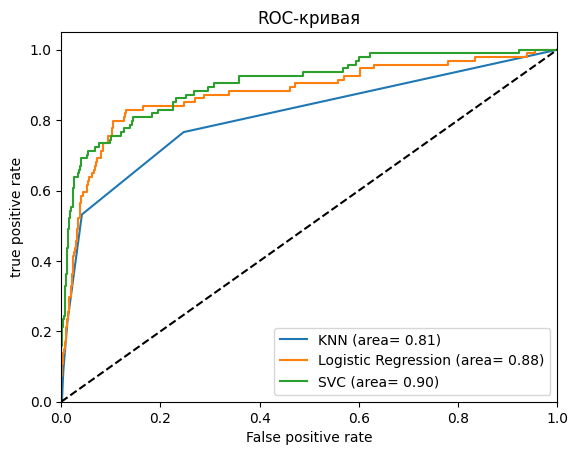

In [71]:
plt.figure()
plt.plot(knn_fpr, knn_tpr, label='KNN (area= %0.2f)' % knn_roc_auc)
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (area= %0.2f)' % logreg_roc_auc)
plt.plot(svc_fpr, svc_tpr, label='SVC (area= %0.2f)' % svc_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

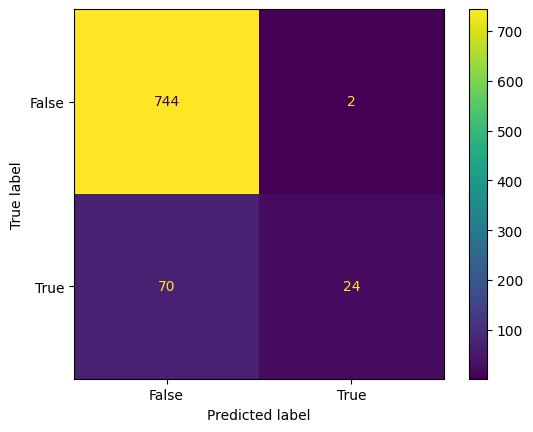

In [72]:
cm = confusion_matrix(y_test, y_pred, labels=best_knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn_model.classes_)
disp.plot()
plt.show()

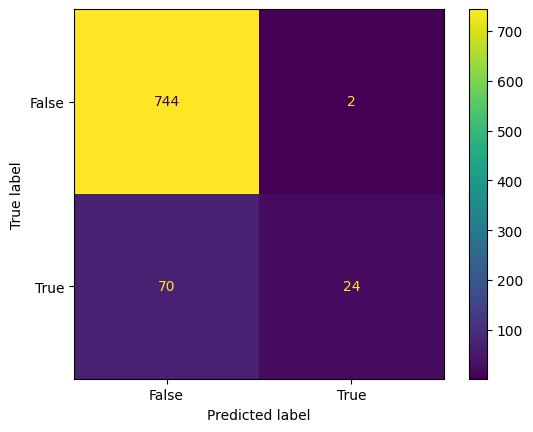

In [73]:
cm = confusion_matrix(y_test, y_pred, labels=best_logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_logreg_model.classes_)
disp.plot()
plt.show()

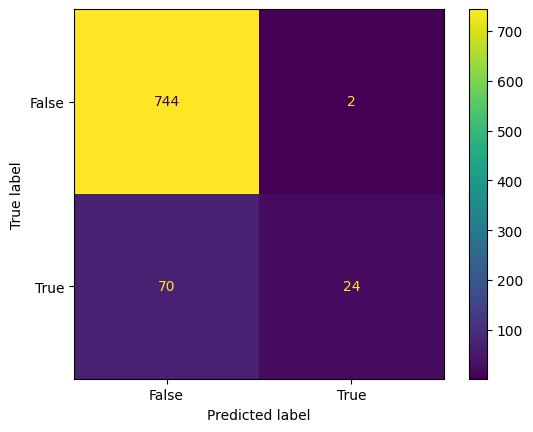

In [75]:
cm = confusion_matrix(y_test, y_pred, labels=best_svc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svc_model.classes_)
disp.plot()
plt.show()